# Project 2 - House Prices


## Description
In this project we are given two data sets, each containing information on 1,459 houses in a single city (Ames, Iowa), including 79 variables for each house. The first data set is intended for training our models, while the second is for testing them. Our goal is to predict the price of each home using regression models.

The data sets may be downloaded from https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

## Considerations
Before modelling the data, we must:
1. Frame the problem and look at the big picture.
1. Prepare the data, checking for faulty entries (empty cells or cells with "nan"s or other values that do not make sense in the context of the problem) and normalizing it if necessary.
1. Explore the data with visual tools to gain some insight and intuition.

While modelling the data, we must:
1. Explore many different models and shortlist the best ones.
1. Fine-tune our models, and possibly combine more than one to greater effect.

### Installing and importing necessary modules

In [ ]:
pip install pandas seaborn matplotlib # Restart the Python kernel after installation!

In [169]:
import pandas as pd # For creating dataframes and calculating correlation matrices.
from pandas.api.types import CategoricalDtype # For correctly setting some dataframe colummns as being of categorical type

from pathlib import Path # For defining the path directory in which the data is stored

import seaborn as sn   # For creating visual representations
import matplotlib
import matplotlib.pyplot as plt # of correlation matrices.

import numpy as np #For numerical opertions
import math     #For Mathematcal operations

from scipy import stats #For statistical operations



from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score

### Importing the data

In [170]:
data_dir = Path("~/Data/House Prices/") # Directory in which to look for the data

df_train = pd.read_csv(data_dir / "train.csv") # Import training data as a pandas dataframe 
df_test = pd.read_csv(data_dir / "test.csv") # Import test data file as a pandas dataframe
df_concat = pd.concat([df_train, df_test]) # Concatenate dataframes to process them simultaneously

### Inspecting the data

In [171]:
df_concat.BldgType.unique() # Check the dataframe's categorical attributes for errors

# Typos:
# MSZoning has a "C (all)" value instead of "C"
# Neighborhood has a "NAmes" value instead of "Names"
# BldgType has a "2fmCon" value instead of "2FmCon", a "Duplex" value instead of "Duplx"
# BldgType has "Twnhs" value which could possible be "TwnhsI" (or not?)!
# HouseStyle has a "SLv1" value instead of "SLvl"
# Exterior2nd has a "Wd Shng" value instead of "WdShing" and a "Brk Cmn" value instead of "BrkComm"

# nans:
# MSZoning has a "nan" value not found in data_description.txt!
# Alley has a "nan" value instead of "NA"!
# Utilities has a "nan" value not found in data_description.txt!
# Exterior1st has a "nan" value not found in data_description.txt!
# Exterior2nd has a "nan" value not found in data_description.txt!
# MasVnrType has a "nan" value not found in data_description.txt!
# BsmtQual has a "nan" value not found in data_description.txt!
# BsmtCond has a "nan" value not found in data_description.txt!
# BsmtExposure has a "nan" value not found in data_description.txt!
# BsmtFinType1 has a "nan" value not found in data_description.txt!
# BsmtFinType2 has a "nan" value not found in data_description.txt!
# Electrical has a "nan" value not found in data_description.txt!
# BsmtFullBath has a "nan" value not found in data_description.txt!
# BsmtHalfBath has a "nan" value not found in data_description.txt!
# Functional has a "nan" value not found in data_description.txt! <- the text document says to "Assume typical unless deductions are warranted"
# FireplaceQu has a "nan" value not found in data_description.txt!
# GarageType has a "nan" value not found in data_description.txt!
# GarageYrBlt has a "nan" value not found in data_description.txt!
# GarageFinish has a "nan" value instead of "NA"!
# GarageQual has a "nan" value instead of "NA"!
# GarageCond has a "nan" value instead of "NA"!
# PoolQC has a "nan" value instead of "NA"!
# Fence has a "nan" value instead of "NA"!
# MiscFeature has a "nan" value instead of "NA"!
# SaleType has a "nan" value not found in data_description.txt!

# Incorrect data types:
# MSSubClass has "int" data type, but the numbers are just identifiers (nominal)
# MSZoning has "object" data type
# Street has "object" data type with a 2 degree scale
# Alley has "object" data type with a 3 degree scale
# LotShape has "object" data type
# LandContour has "object" data type
# Utilities has "object" data type with a 4 degree scale
# LotConfig has "object" data type
# LandSlope has "object" data type
# Neighborhood has "object" data type
# Condition1 has "object" data type
# Condition2 has "object" data type
# BldgType has "object" data type
# HouseStyle has "object" data type
# OverallQual has "int" data type, but represents an ordered categorical feature
# OverallCond has "int" data type, but represents an ordered categorical feature
# RoofStyle has "object" data type
# RoofMatl has "object" data type
# Exterior1st has "object" data type
# Exterior2nd has "object" data type
# MasVnrType has "object" data type
# ExterQual has "object" data type with a 5 degree scale
# ExterCond has "object" data type with a 5 degree scale
# Foundation has "object" data type
# BsmtQual has "object" data type with a 5 degree scale
# BsmtCond has "object" data type with a 6 degree scale
# BsmtExposure has "object" data type with a 5 degree scale
# BsmtFinType1 has "object" data type with a 7 degree scale
# BsmtFinType2 has "object" data type with a 7 degree scale
# Heating has "object" data type
# HeatingQC has "object" data type with a 5 degree scale
# CentralAir has "object" data type
# Electrical has "object" data type
# BsmtFullBath has a "float" data type, whereas "int" would be more appropriate
# BsmtHalfBath has a "float" data type, whereas "int" would be more appropriate
# KitchenQual has "object" data type
# Functional has "object" data type with an 8 degree scale
# FireplaceQu has "object" data type with a 6 degree scale
# GarageType has "object" data type
# GarageFinish has "object" data type with a 4 degree scale
# GarageCars has a "float" data type, whereas "int" would be more appropriate
# GarageQual has "object" data type with a 6 degree scale
# GarageCond has "object" data type with a 6 degree scale
# PavedDrive has "object" data type with a 3 degree scale
# PoolQC has "object" data type with a 5 degree scale

# No further inconsistencies were found in the numerical data

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

### Correcting typos

In [172]:
def correct_typos(df): # Function for correcting errors detected in the data sets when compared to the data_description.txt file
    # Correcting typos
    df["MSZoning"] = df["MSZoning"].replace({"C (all)": "C"})
    df["Neighborhood"] = df["Neighborhood"].replace({"NAmes": "Names"})
    df["BldgType"] = df["BldgType"].replace({"2fmCon": "2FmCon"})
    df["BldgType"] = df["BldgType"].replace({"Duplex": "Duplx"})
    df["HouseStyle"] = df["HouseStyle"].replace({"SLv1": "SLvl"})
    df["Exterior2nd"] = df["Exterior2nd"].replace({"Wd Shng": "WdShing"})
    df["Exterior2nd"] = df["Exterior2nd"].replace({"Brk Cmn": "BrkComm"})
    # Changing names that start with numbers, which can be hard to work with in Python
    df.rename(columns={
        "1stFlrSF": "FirstFlrSF",
        "2ndFlrSF": "SecondFlrSF",
        "3SsnPorch": "ThreeSeasonPorch",
    }, inplace=True)
    return df

correct_typos(df_concat)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


### Correcting datatypes and labeling missing values

In [173]:
nominal_features = ["MSSubClass", "MSZoning", "Street", "Alley", "Utilities", "LotShape", "LandContour", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "BsmtFinType1", "BsmtFinType2", "BsmtExposure", "Heating", "CentralAir", "Electrical", "Functional", "GarageType", "GarageFinish", "PavedDrive", "Fence", "MiscFeature", "SaleType", "SaleCondition"]
Po_to_EX=["ExterQual","ExterCond","HeatingQC","KitchenQual"]
ten_levels = list(range(1,11))
six_levels = ["NA", "Po", "Fa", "TA", "Gd", "Ex"]
five_levels = six_levels[1:6]

scales = { # Dictionary with scales corresponding to each ordered feature
    #"OverallQual" : ten_levels,
    #"OverallCond" : ten_levels,
    #"ExterQual" : five_levels,
    #"ExterCond" : five_levels,
    "BsmtQual" : six_levels,
    "BsmtCond" : six_levels,
    #"HeatingQC" : five_levels,
    #"KitchenQual" : five_levels,
    "FireplaceQu" : six_levels,
    "GarageQual" : six_levels,
    "GarageCond" : six_levels,
    "PoolQC" : [six_levels[0]] + six_levels[2:6] # equal to ["Na", "Fa", "TA", "Gd", "Ex"]
}

def correct_datatypes(df): # Function for correcting errors detected in data types
    # Encode nominal features as such
    for nom_feature in nominal_features: # For each nominal feature
        df[nom_feature] = df[nom_feature].astype("category") # Set datatype as 'category'
    for ord_feature, scale in scales.items(): # For each ordered feature and corresponding scale
        df[ord_feature] = df[ord_feature].astype(CategoricalDtype(scale, ordered=True))
    for feature in Po_to_EX:
        df[feature] = df[feature].replace({'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
    return df

def label_missing_values(df):
    df["KitchenQual"] = df["KitchenQual"].fillna(3)
    df["GarageCars"] = df["GarageCars"].fillna(0)
    df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0)
    for name in df.select_dtypes("category"):
        df[name] = df[name].cat.add_categories("NaN").fillna("NaN") # Adds an 'NaN' value to cells with no input
    return df

label_missing_values(correct_datatypes(df_concat)).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Id                2919 non-null   int64   
 1   MSSubClass        2919 non-null   category
 2   MSZoning          2919 non-null   category
 3   LotFrontage       2433 non-null   float64 
 4   LotArea           2919 non-null   int64   
 5   Street            2919 non-null   category
 6   Alley             2919 non-null   category
 7   LotShape          2919 non-null   category
 8   LandContour       2919 non-null   category
 9   Utilities         2919 non-null   category
 10  LotConfig         2919 non-null   category
 11  LandSlope         2919 non-null   category
 12  Neighborhood      2919 non-null   category
 13  Condition1        2919 non-null   category
 14  Condition2        2919 non-null   category
 15  BldgType          2919 non-null   category
 16  HouseStyle        2919 n

### Visualizing value distributions in columns with missing values

In [174]:
df_concat.columns # Show dataframe columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

<AxesSubplot:ylabel='None'>

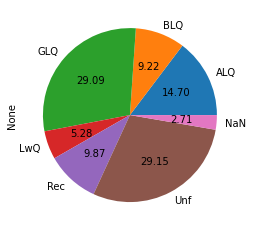

In [175]:
# Visualize value distribution for dataframe attributes with categorical data
df_concat.groupby('BsmtFinType1').size().plot(kind='pie', autopct='%.2f')

# 'Street' attribute is 99.59% 'Pave'
# 'Alley' attribute is 93.22% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'Utilities' attribute is 99.90% 'AllPub'
# 'Condition2' attribute is 98.97% 'Norm'
# 'BldgType' should probably have 'Twnhs' values changed to 'TwnhsI'
# 'RoofMatl' attribute is 98.53% 'CompShg'
# 'BsmtExposure' attribute is 2.81% 'NaN'; changing this to 'No' would change the distribution the least
# 'BsmtFinType1' attribute is 2.71% 'NaN', however, changing this to a particular value might alter the distribution!
# 'BsmtFinType2' attribute is 2.74% 'NaN'; changing this to 'Unf' would change the distribution the least
# 'Heating' attribute is 98,46% GasA
# 'CentralAir' attribute is 0.00% 'NaN'; changing this value to 'Y' would change the distribution the least
# 'Electrical' attribute is 0.03% 'NaN'; changing this to 'SBrkr' would change the distribution the least
# 'KitchenQual' attribute is 0.00% 'NaN'; changing this to 'TA' would change the distribution the least
# 'Functional' attribute is 93.08% 'Typ'
# 'FireplaceQu' attribute is 48.65 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'GarageType' attribute is 5.38% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'GarageFinish' attribute is 5.45% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'GarageQual' attribute is 5.45% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'GarageCond' attribute is 5.45% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'PavedDrive' attribute is 0.00% 'NaN'' changing this value to 'Y' would change the distribution the least
# 'PoolQC' attribute is 99.66% 'NaN'; these should probably be changed to 'NA' since 'PoolArea' attribute is 99.55% '0'
# 'Fence' attribute is 80.44% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'MiscFeature' attribute is 96.40% 'NaN'; these should probably be changed to 'NA' since no 'NA' value was inputted
# 'SaleType' attribute is 0.03% 'NaN'; changing this to 'WD' would change the distribution the least

### Handling missing values

<AxesSubplot:ylabel='None'>

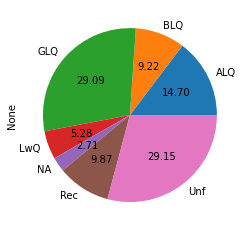

In [176]:
NaNtoNA = ["Alley", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature", "BsmtFinType1"]
NaNtoOther = {'BsmtExposure' : 'No', 'BsmtFinType2' : 'Unf', 'CentralAir' : 'Y', 'Electrical' : 'SBrkr', 'PavedDrive' : 'Y', 'SaleType' : 'WD'}

def handle_missing_values(df):
    df_concat['BldgType'].replace({'Twnhs' : 'TwnhsI'})
    for name in NaNtoNA:
        df[name] = df[name].replace({'NaN' : 'NA'})
    for name, value in NaNtoOther.items():
        df[name] = df[name].replace({'NaN' : value})    
    return df

df_handled = handle_missing_values(df_concat)
df_handled.groupby('BsmtFinType1').size().plot(kind='pie', autopct='%.2f')

### Encoding categorical data

In [177]:
categorical_columns = list(set(df_handled.select_dtypes(exclude=["number"])))
categorical_columns

['Electrical',
 'Alley',
 'Fence',
 'LandSlope',
 'GarageQual',
 'Exterior1st',
 'HouseStyle',
 'Exterior2nd',
 'RoofMatl',
 'Functional',
 'RoofStyle',
 'Condition2',
 'LotShape',
 'GarageFinish',
 'FireplaceQu',
 'Heating',
 'Neighborhood',
 'Condition1',
 'BsmtCond',
 'BsmtFinType2',
 'Utilities',
 'BsmtFinType1',
 'GarageCond',
 'LotConfig',
 'CentralAir',
 'Street',
 'BsmtExposure',
 'PoolQC',
 'LandContour',
 'MSSubClass',
 'MSZoning',
 'GarageType',
 'SaleCondition',
 'BldgType',
 'MasVnrType',
 'Foundation',
 'MiscFeature',
 'BsmtQual',
 'PavedDrive',
 'SaleType']

In [178]:
df_prepared = pd.get_dummies(df_handled, columns = categorical_columns) # OneHotEncoder for categorical columns

In [179]:
df_prepared_train = df_prepared.iloc[:1460,:]
df_prepared_test = df_prepared.iloc[1461:,:]

df_prepared_train

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,PavedDrive_NaN,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,0,0,0,0,0,0,0,1
1,2,80.0,9600,6,8,1976,1976,0.0,3,3,...,0,0,0,0,0,0,0,0,0,1
2,3,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,0,0,0,0,0,0,0,1
3,4,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,0,0,0,0,0,0,0,1
4,5,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,5,1999,2000,0.0,3,3,...,0,0,0,0,0,0,0,0,0,1
1456,1457,85.0,13175,6,6,1978,1988,119.0,3,3,...,0,0,0,0,0,0,0,0,0,1
1457,1458,66.0,9042,7,9,1941,2006,0.0,5,4,...,0,0,0,0,0,0,0,0,0,1
1458,1459,68.0,9717,5,6,1950,1996,0.0,3,3,...,0,0,0,0,0,0,0,0,0,1


## Correlation Matrix

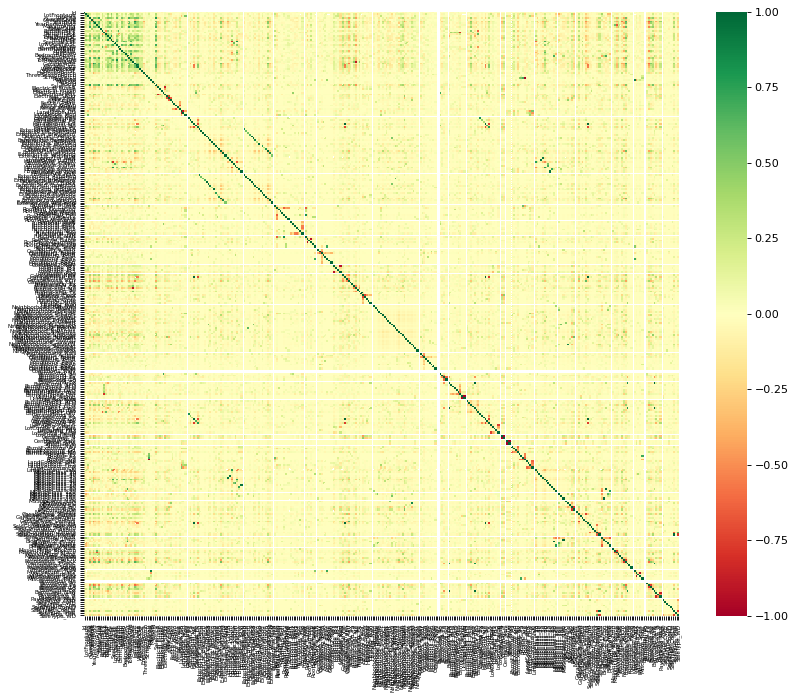

In [180]:
def plotCM(df): # Function for creating and plotting the correlation matrix of a dataframe
    plt.figure(figsize=(12,10), dpi= 80)
    sn.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0)#, annot=True)

    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.show()
    
plotCM(df_prepared_train) # Plot the correlation matrix for the training data

# Select relevant variables

1-Select only the Sale Prices row from the correlation matrix, and save it in a serie called `SP`

2-From `SP` select only those features that have a correlation with the Sale Price greater than `n_SP`, save it in a serie called `SP_n`

3-From the features previously selected, select only those that has a between correlation lower than `n_corr` and keep the most correlated with `'Sale Prices'`

(for this we created the `select_features(df,n_SP,n_corr)` function)

In [126]:
def select_features_print(df,n_SP,n_corr):
    
    
    corrMatrix = df.corr()     #Compute correlation matrix
    
    
    SP=corrMatrix['SalePrice'] #Select only the Sale Price row from the correlation matrix,
    
    SP=SP[1>abs(SP)]           #quit self correlaion and save it in a serie called SP
    
    SP_n=SP[abs(SP) > n_SP]    #From SP select only those features that have a correlation 
                               #with the Sale Price greater than n_SP, 
                               #save it in a vector called SP_n
    
    SP_index=SP_n.index        #Save the index of SP_n in a string vector called SP_index
    
    
##From the features previously selected, 
#select only those that has a btween correlation lower than n_corr 
#and keep the most correlated with 'SalePrice':
    
    relevant_features=list(SP_index)
    
    for feat1 in SP_index:
        print(1)
        print(relevant_features)
        
        if feat1 in relevant_features:
            
            print('feature1=',feat1)
            
            for feat2 in SP_index:
                
                if (feat2 in relevant_features and feat1 in relevant_features and feat1!=feat2):
                
                    print(2)
                    print('feature2=',feat2)
                    
                    #Check corrrelation between features:

                    if (corrMatrix[feat1][feat2] > n_corr):
                        print('corr[',feat1,',',feat2,']=',corrMatrix[feat1][feat2])
                        print(3)
                        
                        #Remove the feature with less correlation with Sale Prices:
            
                        if (SP_n[feat1] > SP_n[feat2]):
                            print(4)
                            print(relevant_features)
                            print('corr[',feat1,', Sale Prices ]=',SP_n[feat1])
                            print('corr[',feat2,', Sale Prices ]=',SP_n[feat2])
                            
                            if feat2 in relevant_features:
                                
                                relevant_features.remove(feat2)
                                print('feature removed=',feat2)
                                
                            print(relevant_features)
                
                        if (SP_n[feat2] > SP_n[feat1]):
                            print(5)
                            print(relevant_features)
                            print('corr[',feat2,', Sale Prices ]=',SP_n[feat2])
                            print('corr[',feat1,', Sale Prices ]=',SP_n[feat1])
                            if feat1 in relevant_features:
                                
                                relevant_features.remove(feat1)
                                print('feature removed=',feat1)
                            
                            print(relevant_features)
                
    
    
    return relevant_features
    

In [356]:
n_corr=0.7 #features maximum inter-correlation
n_SP=0.55   #fatures minimum correlation with Sale Price
select_features_print(df_prepared_train,n_SP,n_corr)

1
['OverallQual', 'ExterQual', 'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea', 'BsmtQual_Ex']
feature1= OverallQual
2
feature2= ExterQual
corr[ OverallQual , ExterQual ]= 0.7262784907641455
3
4
['OverallQual', 'ExterQual', 'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea', 'BsmtQual_Ex']
corr[ OverallQual , Sale Prices ]= 0.7909816005838047
corr[ ExterQual , Sale Prices ]= 0.6826392416562591
feature removed= ExterQual
['OverallQual', 'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea', 'BsmtQual_Ex']
2
feature2= TotalBsmtSF
2
feature2= FirstFlrSF
2
feature2= GrLivArea
2
feature2= FullBath
2
feature2= KitchenQual
2
feature2= GarageCars
2
feature2= GarageArea
2
feature2= BsmtQual_Ex
1
['OverallQual', 'TotalBsmtSF', 'FirstFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea', 'BsmtQual_Ex']
1
['OverallQual', 'TotalBsmtSF', 'FirstFl

['OverallQual',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'KitchenQual',
 'GarageCars',
 'BsmtQual_Ex']

In [226]:
def select_features(df,n_SP,n_corr):
    
    
    corrMatrix = df.corr()     #Compute correlation matrix
    
    
    SP=corrMatrix['SalePrice'] #Select only the Sale Price row from the correlation matrix,
    
    SP=SP[1>abs(SP)]           #quit self correlaion and save it in a serie called SP
    
    SP_n=SP[abs(SP) > n_SP]    #From SP select only those features that have a correlation 
                               #with the Sale Price greater than n_SP, 
                               #save it in a vector called SP_n
    
    SP_index=SP_n.index        #Save the index of SP_n in a string vector called SP_index
    
    
##From the features previously selected, 
#select only those that has a btween correlation lower than n_corr 
#and keep the most correlated with 'SalePrice':
    
    relevant_features=list(SP_index)
    #if ('TotalBsmtSF' in relevant_features):
     #   relevant_features.remove('TotalBsmtSF')
    
    
    for feat1 in SP_index:
        #print(1)
        #print(relevant_features)
        
        if feat1 in relevant_features:
            
            #print('feat1=',feat1)
            
            for feat2 in SP_index:
                
                if (feat2 in relevant_features and feat1 in relevant_features and feat1!=feat2):
                
                    #print(2)
                    #print('feat2=',feat2)
                    
                    #Check corrrelation between features:

                    if (corrMatrix[feat1][feat2] > n_corr):
                        #print('corr[',feat1,',',feat2,']=',corrMatrix[feat1][feat2])
                        #print(3)
                        
                        #Remove the feature with less correlation with Sale Prices:
            
                        if (SP_n[feat1] > SP_n[feat2]):
                            #print(4)
                            #print(relevant_features)
                            #print('corr[',feat1,', Sale Prices ]=',SP_n[feat1])
                            #print('corr[',feat2,', Sale Prices ]=',SP_n[feat2])
                            
                            if feat2 in relevant_features:
                                
                                relevant_features.remove(feat2)
                                #print('feature removed=',feat2)
                                
                            #print(relevant_features)
                
                        if (SP_n[feat2] > SP_n[feat1]):
                            #print(5)
                            #print(relevant_features)
                            #print('corr[',feat2,', Sale Prices ]=',SP_n[feat2])
                            #print('corr[',feat1,', Sale Prices ]=',SP_n[feat1])
                            if feat1 in relevant_features:
                                
                                relevant_features.remove(feat1)
                                #print('feature removed=',feat1)
                            
                            #print(relevant_features)
                
    #relevant_features
    
    
    return relevant_features
    

In [284]:
n_corr=0.7 #features maximum inter-correlation
n_SP=0.65   #fatures minimum correlation with Sale Price
relevant_features=select_features(df_prepared_train,n_SP,n_corr)

In [285]:
X = df_prepared_train[relevant_features]
X.head()

,OverallQual,GrLivArea,KitchenQual
0,7,1710,4.0
1,6,1262,3.0
2,7,1786,4.0
3,7,1717,4.0
4,8,2198,4.0


In [286]:
Y=df_prepared_train['SalePrice']
Y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

## Split train data for train and test regression models

In [287]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [288]:
x_train.head()

,OverallQual,GrLivArea,KitchenQual
1358,6,1573,4.0
390,5,1367,3.0
1334,5,1365,3.0
1072,5,1456,3.0
1443,6,952,2.0


In [289]:
y_train.head()

1358    177500.0
390     119000.0
1334    125000.0
1072     91500.0
1443    121000.0
Name: SalePrice, dtype: float64

In [290]:
x_test.head()

,OverallQual,GrLivArea,KitchenQual
756,8,1768,4.0
923,6,1617,4.0
1423,6,2201,4.0
217,4,1328,3.0
653,6,1469,3.0


In [291]:
y_test.head()

756     212000.0
923     193000.0
1423    274970.0
217     107000.0
653     135000.0
Name: SalePrice, dtype: float64

## Linear Regression

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients $w = (w1, …, wp)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [292]:
linear_model = LinearRegression(normalize=False)
linear_model.fit(x_train,y_train)
linear_model.coef_

array([25082.22805813,    49.3781162 , 28220.24739564])

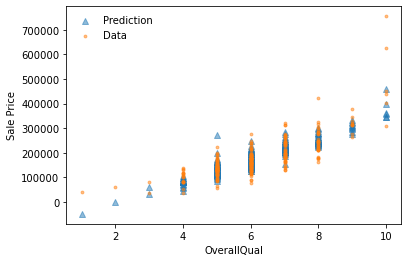

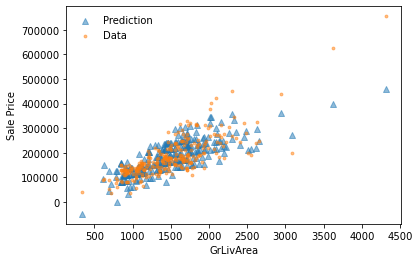

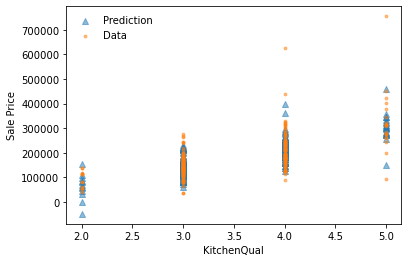

In [293]:
for feature in relevant_features:
    plt.scatter(x_test[feature].values, linear_model.predict(x_test),marker='^',alpha=0.5, label='Prediction')
    plt.scatter(x_test[feature].values, y_test.values,marker='o',alpha=0.5,s=8, label='Data')
    plt.legend(loc='best', frameon=False)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

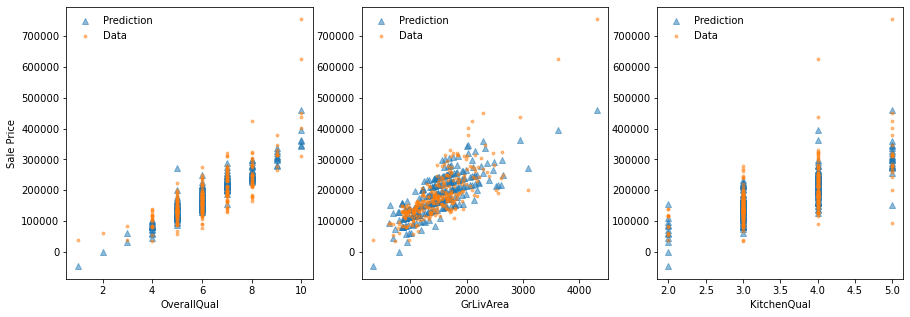

In [346]:
f, axarr = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
plt.sca(axarr[0]);

#axis1 = fig.add_subplot(211)
plt.scatter(x_test[relevant_features[0]].values, linear_model.predict(x_test),marker='^',alpha=0.5, label='Prediction')
plt.scatter(x_test[relevant_features[0]].values, y_test.values,marker='o',alpha=0.5,s=8, label='Data')
plt.legend(loc='best', frameon=False)
plt.xlabel(relevant_features[0])
plt.ylabel('Sale Price')
#plt.show()

plt.sca(axarr[1]); 
#axis2 = fig.add_subplot(212)
plt.scatter(x_test[relevant_features[1]].values, linear_model.predict(x_test),marker='^',alpha=0.5, label='Prediction')
plt.scatter(x_test[relevant_features[1]].values, y_test.values,marker='o',alpha=0.5,s=8, label='Data')
plt.legend(loc='best', frameon=False)
plt.xlabel(relevant_features[1])
#plt.ylabel('Sale Price')

plt.sca(axarr[2]); 
#axis2 = fig.add_subplot(212)
plt.scatter(x_test[relevant_features[2]].values, linear_model.predict(x_test),marker='^',alpha=0.5, label='Prediction')
plt.scatter(x_test[relevant_features[2]].values, y_test.values,marker='o',alpha=0.5,s=8, label='Data')
plt.legend(loc='best', frameon=False)
plt.xlabel(relevant_features[2])
#plt.ylabel('Sale Price')
plt.show()


In [245]:
print(linear_model.score(x_test,y_test))

0.7736190267006654


## Lasso Model

Linear Model trained with L1 prior as regularizer (aka the Lasso).

In [246]:
lasso_model = Lasso(alpha=0.5,normalize=True, max_iter=1e6)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.5, max_iter=1000000.0, normalize=True)

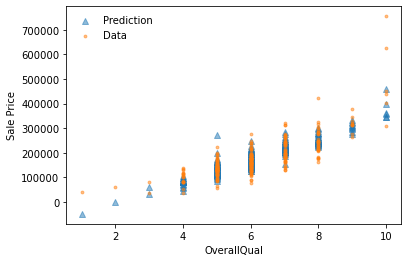

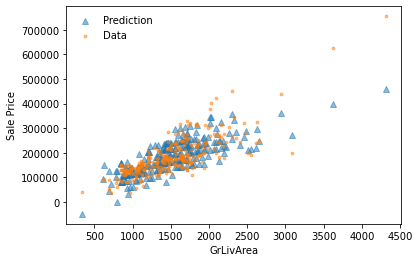

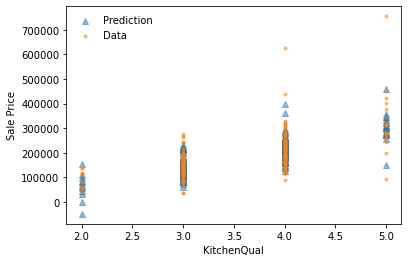

In [247]:
for feature in relevant_features:
    plt.scatter(x_test[feature].values, lasso_model.predict(x_test),marker='^',alpha=0.5, label='Prediction')
    plt.scatter(x_test[feature].values, y_test.values,marker='o',alpha=0.5,s=8, label='Data')
    plt.legend(loc='best', frameon=False)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

In [248]:
print(lasso_model.score(x_test,y_test))

0.7735997030871158


## Ridge Model

Linear least squares with l2 regularization. This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).



In [249]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.5)

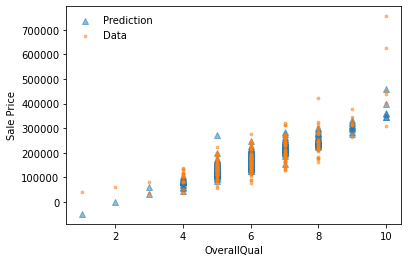

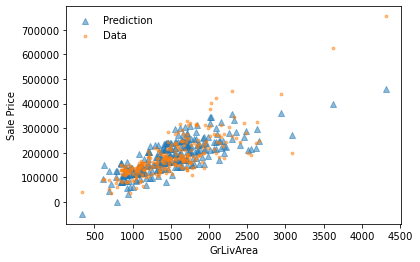

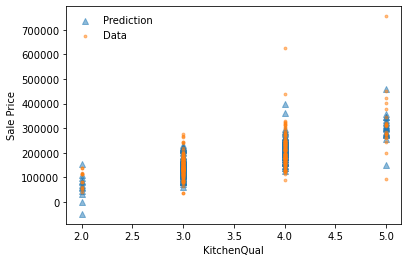

In [250]:
for feature in relevant_features:
    plt.scatter(x_test[feature].values, ridge_model.predict(x_test),marker='^',alpha=0.5, label='Prediction')
    plt.scatter(x_test[feature].values, y_test.values,marker='o',alpha=0.5,s=8, label='Data')
    plt.legend(loc='best', frameon=False)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

In [251]:
print(ridge_model.score(x_test,y_test))

0.7736648289139026


`name_model.score(X, y)` returns the coefficient of determination $R^2$, defined as $(1-\frac{u}{v})$, where $u$ is the residual sum of squares and $v$ is the total sum of squares. . The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of `y`, disregarding the input features, would get a $R^2$ score of 0.0.

## Choose the best model and feeding featuers

In order to choose the best fitting features for the models, we check different values for the minimum features correlation with Sale Price and the maximum correlation allowed between features. For each case we perform one of the linear regression models from above, and compute the coefficient of determination (score), obtaining the best feature selection and regression model when this values reaches its maximum.

### Linear Regression

['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual']
['OverallQual', 'TotRmsAbvGrd']
['OverallQual', 'TotRmsAbvGrd']
['OverallQual', 'TotRmsAbvGrd']
['OverallQual', 'TotRmsAbvGrd']
['OverallQual', 'TotRmsAbvGrd']
['OverallQual', 'FirstFlrSF', 'TotRmsAbvGrd', 'BsmtQual_Ex']
['OverallQual', 'FirstFlrSF', 'TotRmsAbvGrd', 'BsmtQual_Ex']
['OverallQual', 'FirstFlrSF', 'TotRmsAbvGrd', 'BsmtQual_Ex']
['OverallQual', 'FirstFlrSF', 'TotRmsAbvGrd', 'BsmtQual_Ex']
['OverallQual', 'FirstFlrSF', 'TotRmsAbvGrd', 'BsmtQual_Ex']
['OverallQual', 'FirstFlrSF', 'TotRmsAbvGrd', 'BsmtQual_Ex']
['OverallQual', 'TotalBsmtSF', 'TotRmsAbvGrd', 'BsmtQual_Ex']
['OverallQual', 'TotalBsmtSF', 'TotRmsAbvGrd', 'BsmtQual_Ex']
['OverallQual', 'YearRemodAdd', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'BsmtQual_Ex']
['OverallQual', 'YearRemodAdd', 'Tot

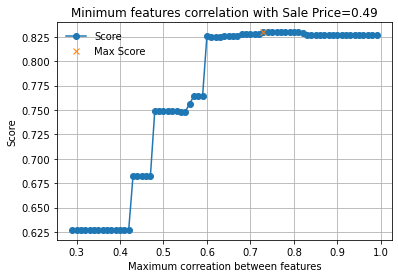

Maximum score value= 0.8297480998819392 find at Maximum Between Correlation= 0.73
[]


In [227]:
n_corr_inicial=0.29
n_SP_inicial=0.49
score_array=[]
n_corr_array=[]
relevant_features_array=[]
for i in range(1):
    score_array=[]
    n_corr_array=[]
    relevant_features_array=[]
    #n_corr_array=np.zeros(n)
    #score_array=np.zeros(n)
    n_SP=n_SP_inicial+i*0.01
    for j in range(71):
        n_corr=n_corr_inicial+j*0.01
        relevant_features=select_features(df_prepared_train,n_SP,n_corr)
        if relevant_features!=[]:
            print(relevant_features)
            #relevant_features_array=np.concatenate(relevant_features_array,[relevant_features])
            
            
            n_corr_array=np.append(n_corr_array,n_corr)
        
            X = df_prepared_train[relevant_features]
            Y=df_prepared_train['SalePrice']
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
        
            linear_model = LinearRegression(normalize=False)
            linear_model.fit(x_train,y_train)
            score_array=np.append(score_array,linear_model.score(x_test,y_test))
            
    if relevant_features!=[]:    
        plt.plot(n_corr_array,score_array,marker='o',label='Score')
        max_value=np.argmax(score_array)
        plt.plot(n_corr_array[max_value],score_array[max_value],'x',label='Max Score')
        plt.legend(loc='best', frameon=False)
        plt.title('Minimum features correlation with Sale Price='+str(n_SP))
        plt.xlabel('Maximum correation between features')
        plt.ylabel('Score')
        plt.grid(True)
        plt.show()
        max_value=np.argmax(score_array)
        print('Maximum score value=',score_array[max_value],'find at Maximum Between Correlation=',n_corr_array[max_value])#,', with features:',relevant_features_array[max_value])
        print(relevant_features_array)
        

### Lasso

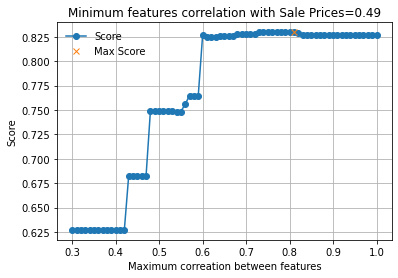

Maximum score value= 0.8296644017279424 find at Maximum Between Correlation= 0.81


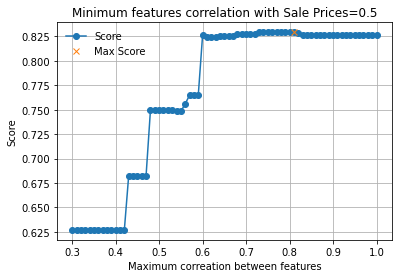

Maximum score value= 0.829268266462081 find at Maximum Between Correlation= 0.81


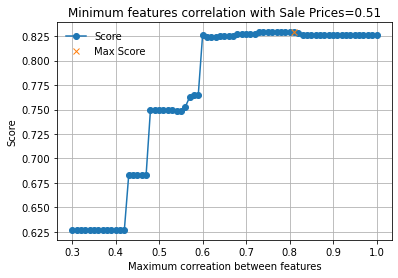

Maximum score value= 0.8289038681592668 find at Maximum Between Correlation= 0.81


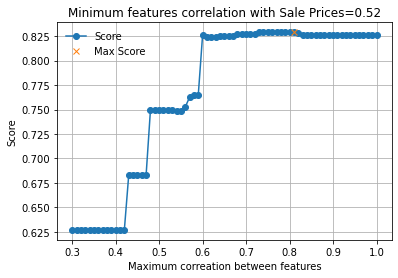

Maximum score value= 0.8289038681592668 find at Maximum Between Correlation= 0.81


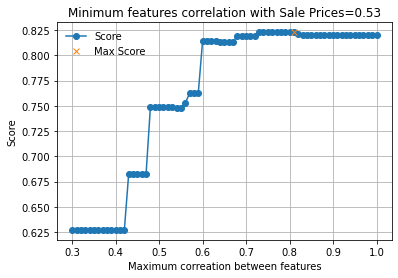

Maximum score value= 0.8229860958561901 find at Maximum Between Correlation= 0.81


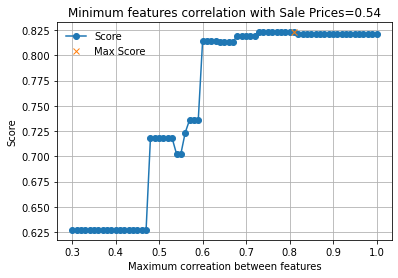

Maximum score value= 0.8229860958561901 find at Maximum Between Correlation= 0.81


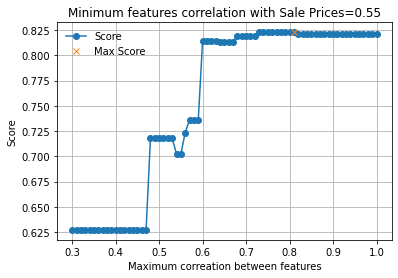

Maximum score value= 0.8229860958561901 find at Maximum Between Correlation= 0.81


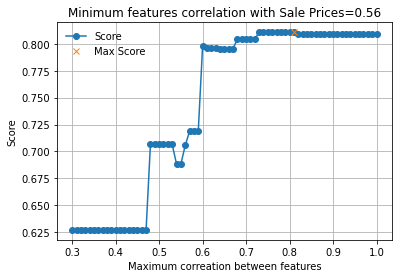

Maximum score value= 0.8107500758081739 find at Maximum Between Correlation= 0.81


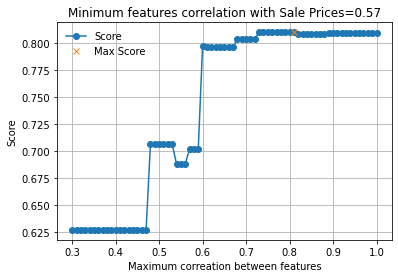

Maximum score value= 0.8104299401375026 find at Maximum Between Correlation= 0.81


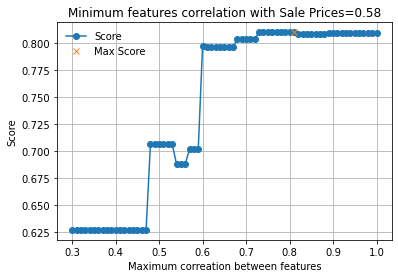

Maximum score value= 0.8104299401375026 find at Maximum Between Correlation= 0.81


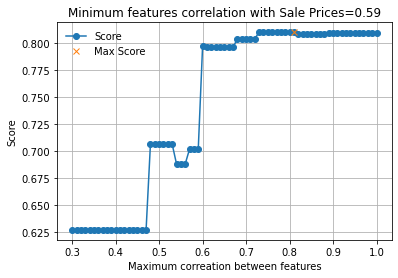

Maximum score value= 0.8104299401375026 find at Maximum Between Correlation= 0.81


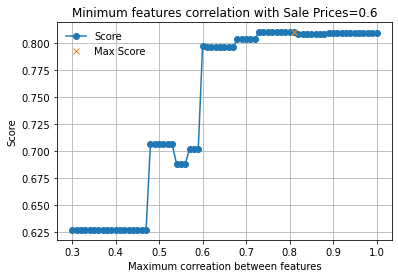

Maximum score value= 0.8104299401375026 find at Maximum Between Correlation= 0.81


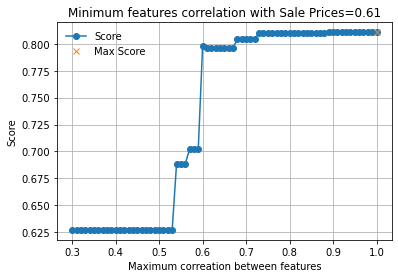

Maximum score value= 0.8108014037918023 find at Maximum Between Correlation= 1.0


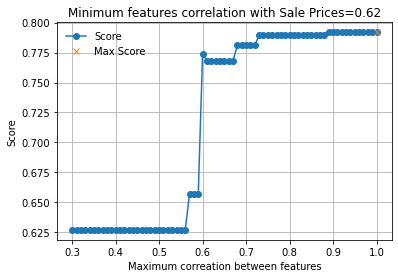

Maximum score value= 0.7919304406072029 find at Maximum Between Correlation= 1.0


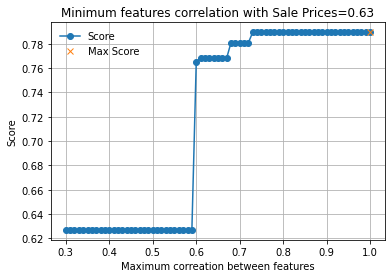

Maximum score value= 0.7895083372835686 find at Maximum Between Correlation= 1.0


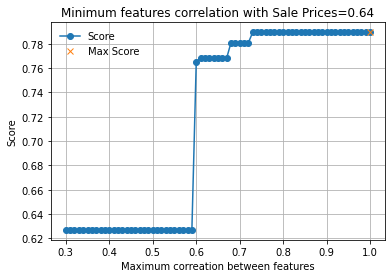

Maximum score value= 0.7895083372835686 find at Maximum Between Correlation= 1.0


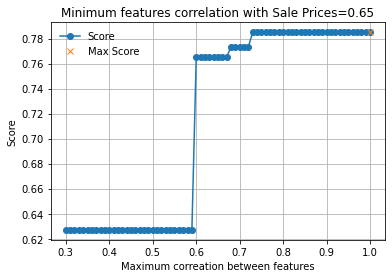

Maximum score value= 0.7850180425377484 find at Maximum Between Correlation= 1.0


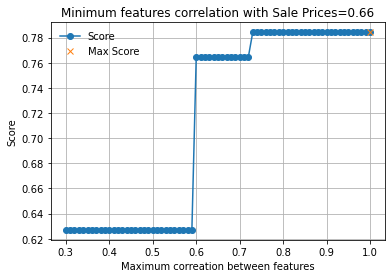

Maximum score value= 0.7842977085510351 find at Maximum Between Correlation= 1.0


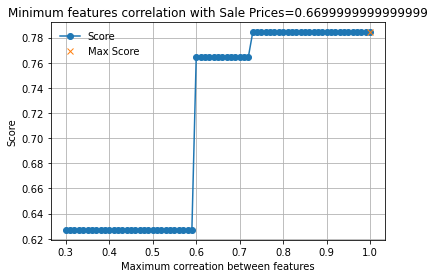

Maximum score value= 0.7842977085510351 find at Maximum Between Correlation= 1.0


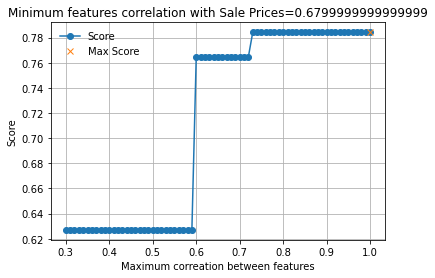

Maximum score value= 0.7842977085510351 find at Maximum Between Correlation= 1.0


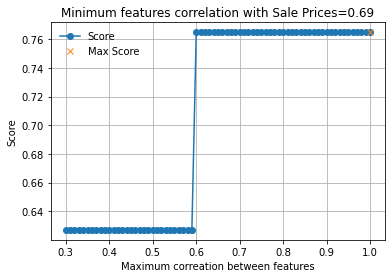

Maximum score value= 0.7649045160722537 find at Maximum Between Correlation= 1.0


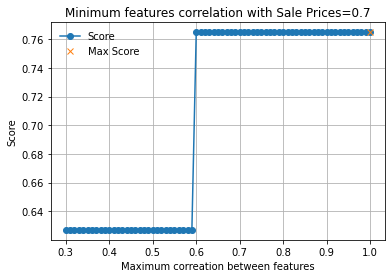

Maximum score value= 0.7649045160722537 find at Maximum Between Correlation= 1.0


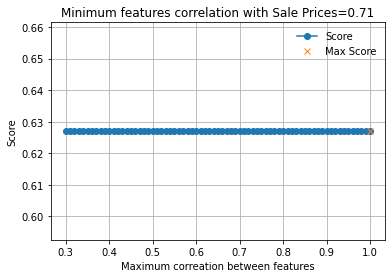

Maximum score value= 0.6270214878199132 find at Maximum Between Correlation= 1.0


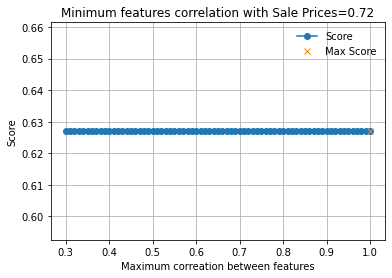

Maximum score value= 0.6270214878199132 find at Maximum Between Correlation= 1.0


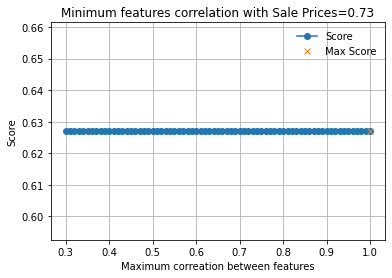

Maximum score value= 0.6270214878199132 find at Maximum Between Correlation= 1.0


In [279]:
n_corr_inicial=1
n_SP_inicial=0.49
score_array=[]
n_corr_array=[]
for i in range(25):
    score_array=[]
    n_corr_array=[]
    #n_corr_array=np.zeros(n)
    #score_array=np.zeros(n)
    n_SP=n_SP_inicial+i*0.01
    for j in range(71):
        n_corr=n_corr_inicial-j*0.01
        relevant_features=select_features(df_prepared_train,n_SP,n_corr)
        if relevant_features!=[]:
            #print(relevant_features)
            
            
            n_corr_array=np.append(n_corr_array,n_corr)
        
            X = df_prepared_train[relevant_features]
            Y=df_prepared_train['SalePrice']
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
        
            lasso_model = Lasso(alpha=0.5,normalize=True, max_iter=1e6)
            lasso_model.fit(x_train,y_train)
            score_array=np.append(score_array,lasso_model.score(x_test,y_test))
        
    plt.plot(n_corr_array,score_array,marker='o',label='Score')
    max_value=np.argmax(score_array)
    plt.plot(n_corr_array[max_value],score_array[max_value],'x',label='Max Score')
    plt.legend(loc='best', frameon=False)
    plt.title('Minimum features correlation with Sale Prices='+str(n_SP))
    plt.xlabel('Maximum correation between features')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()
    max_value=np.argmax(score_array)
    print('Maximum score value=',score_array[max_value],'find at Maximum Between Correlation=',n_corr_array[max_value])
    #print(n_corr_array[max_value])
        

### Ridge

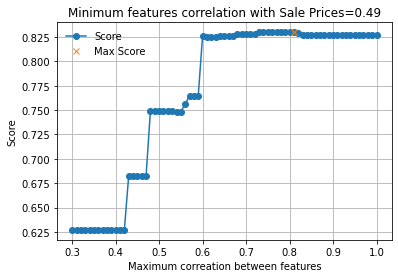

Maximum score value= 0.8298492734100513 find at Maximum Between Correlation= 0.81


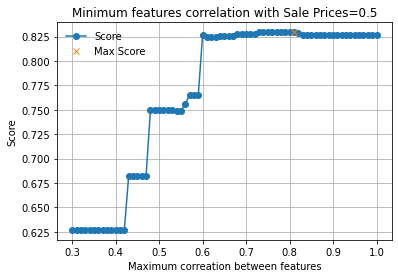

Maximum score value= 0.8294488599300919 find at Maximum Between Correlation= 0.81


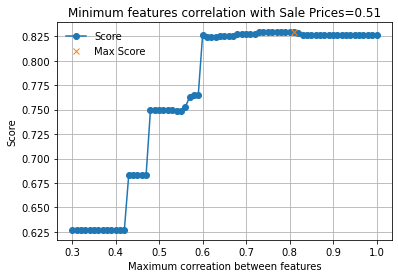

Maximum score value= 0.8290855526799922 find at Maximum Between Correlation= 0.81


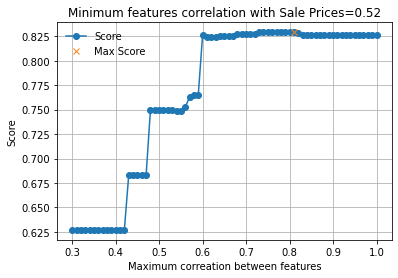

Maximum score value= 0.8290855526799922 find at Maximum Between Correlation= 0.81


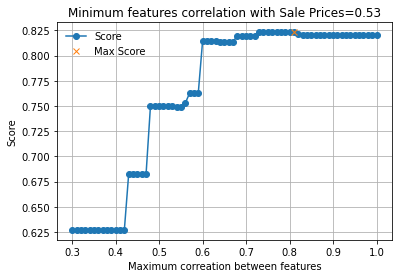

Maximum score value= 0.8231005104633679 find at Maximum Between Correlation= 0.81


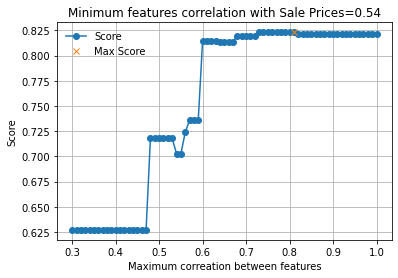

Maximum score value= 0.8231005104633679 find at Maximum Between Correlation= 0.81


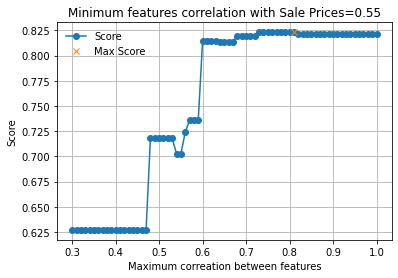

Maximum score value= 0.8231005104633679 find at Maximum Between Correlation= 0.81


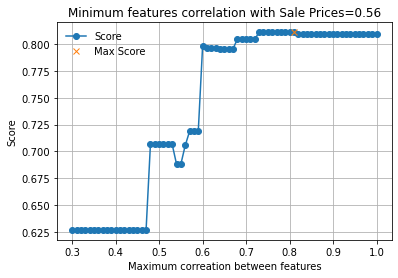

Maximum score value= 0.8108419451621859 find at Maximum Between Correlation= 0.81


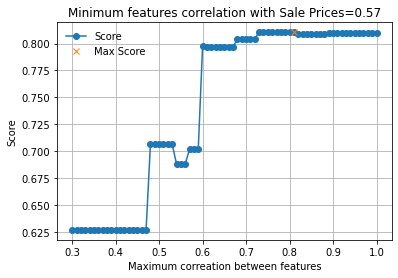

Maximum score value= 0.8104793316130101 find at Maximum Between Correlation= 0.81


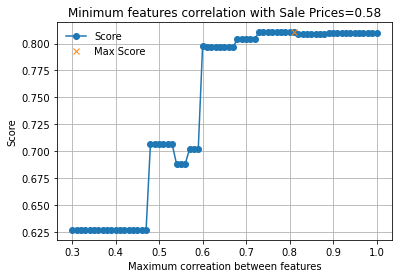

Maximum score value= 0.8104793316130101 find at Maximum Between Correlation= 0.81


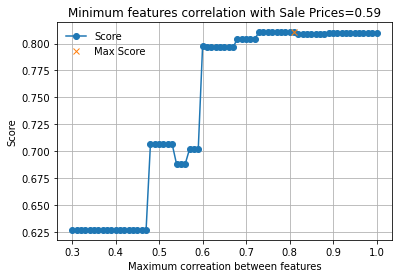

Maximum score value= 0.8104793316130101 find at Maximum Between Correlation= 0.81


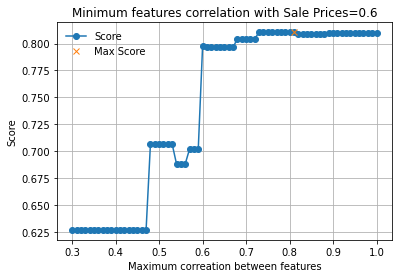

Maximum score value= 0.8104793316130101 find at Maximum Between Correlation= 0.81


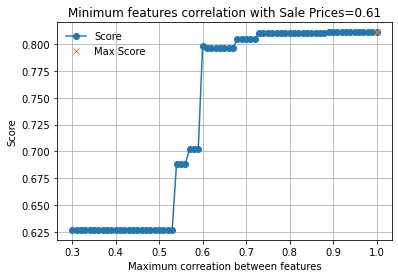

Maximum score value= 0.8108589302675057 find at Maximum Between Correlation= 1.0


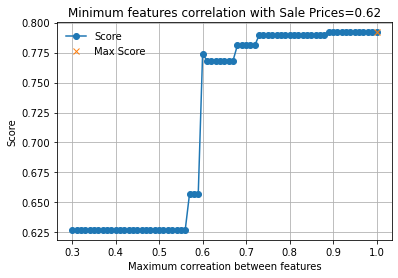

Maximum score value= 0.7919822475912917 find at Maximum Between Correlation= 1.0


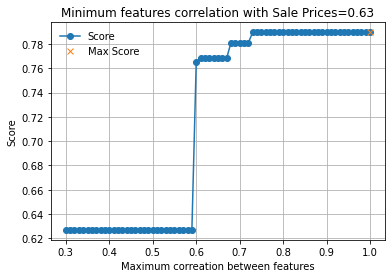

Maximum score value= 0.789554980618153 find at Maximum Between Correlation= 1.0


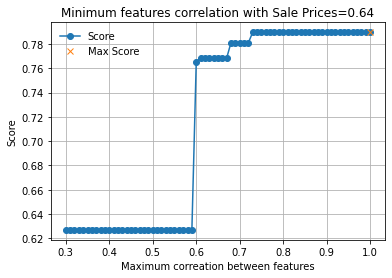

Maximum score value= 0.789554980618153 find at Maximum Between Correlation= 1.0


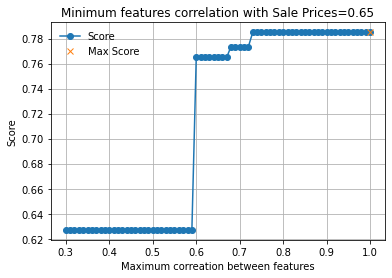

Maximum score value= 0.7850720545767383 find at Maximum Between Correlation= 1.0


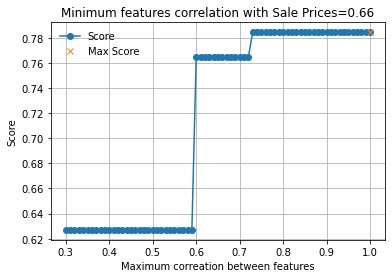

Maximum score value= 0.7843575113151761 find at Maximum Between Correlation= 1.0


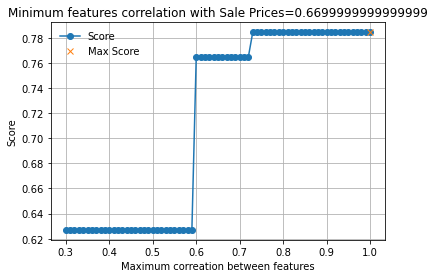

Maximum score value= 0.7843575113151761 find at Maximum Between Correlation= 1.0


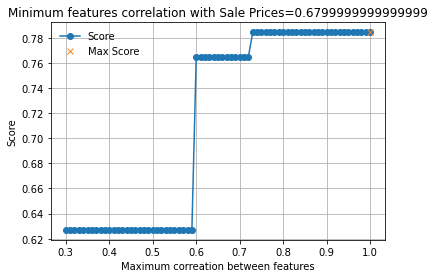

Maximum score value= 0.7843575113151761 find at Maximum Between Correlation= 1.0


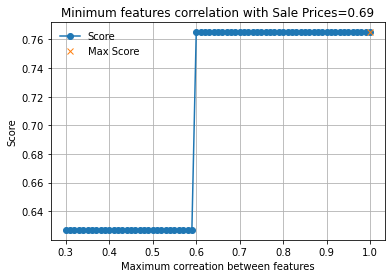

Maximum score value= 0.7649674922505608 find at Maximum Between Correlation= 1.0


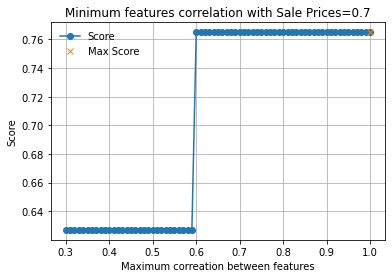

Maximum score value= 0.7649674922505608 find at Maximum Between Correlation= 1.0


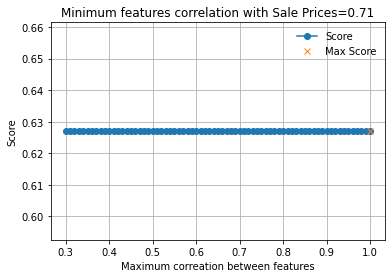

Maximum score value= 0.627021238968124 find at Maximum Between Correlation= 1.0


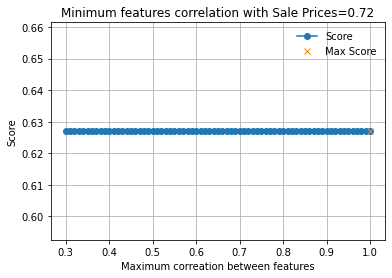

Maximum score value= 0.627021238968124 find at Maximum Between Correlation= 1.0


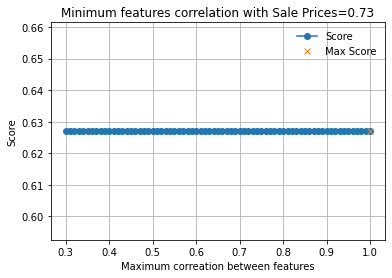

Maximum score value= 0.627021238968124 find at Maximum Between Correlation= 1.0


In [280]:
n_corr_inicial=1
n_SP_inicial=0.49
score_array=[]
n_corr_array=[]
for i in range(25):
    score_array=[]
    n_corr_array=[]
    #n_corr_array=np.zeros(n)
    #score_array=np.zeros(n)
    n_SP=n_SP_inicial+i*0.01
    for j in range(71):
        n_corr=n_corr_inicial-j*0.01
        relevant_features=select_features(df_prepared_train,n_SP,n_corr)
        if relevant_features!=[]:
            #print(relevant_features)
            
            
            n_corr_array=np.append(n_corr_array,n_corr)
        
            X = df_prepared_train[relevant_features]
            Y=df_prepared_train['SalePrice']
            x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
        
            ridge_model = Ridge(alpha=0.5)
            ridge_model.fit(x_train,y_train)
            score_array=np.append(score_array,ridge_model.score(x_test,y_test))
        
    plt.plot(n_corr_array,score_array,marker='o',label='Score')
    max_value=np.argmax(score_array)
    plt.plot(n_corr_array[max_value],score_array[max_value],'x',label='Max Score')
    plt.legend(loc='best', frameon=False)
    plt.title('Minimum features correlation with Sale Prices='+str(n_SP))
    plt.xlabel('Maximum correation between features')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()
    max_value=np.argmax(score_array)
    print('Maximum score value=',score_array[max_value],'find at Maximum Between Correlation=',n_corr_array[max_value])
    #print(n_corr_array[max_value])
        

# Final Results

We found that the best model is the Ridge model, and the best feature selection occured when `n_SP=0.49` and `n_corr=0.81`. 

We use this values to find the features and train a Ridge model.

In [348]:
n_SP=0.49
n_corr=0.81

relevant_features=select_features(df_prepared_train,n_SP,n_corr)

X_TRAIN= df_prepared_train[relevant_features]
X_TRAIN

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,Foundation_PConc,BsmtQual_Ex
0,7,2003,2003,4,856.0,1710,2,4.0,2.0,1,0
1,6,1976,1976,3,1262.0,1262,2,3.0,2.0,0,0
2,7,2001,2002,4,920.0,1786,2,4.0,2.0,1,0
3,7,1915,1970,3,756.0,1717,1,4.0,3.0,0,0
4,8,2000,2000,4,1145.0,2198,2,4.0,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,3,953.0,1647,2,3.0,2.0,1,0
1456,6,1978,1988,3,1542.0,2073,2,3.0,2.0,0,0
1457,7,1941,2006,5,1152.0,2340,2,4.0,1.0,0,0
1458,5,1950,1996,3,1078.0,1078,1,4.0,1.0,0,0


In [349]:
Y_TRAIN=df_prepared_train['SalePrice']

Y_TRAIN


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [350]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_TRAIN,Y_TRAIN)


Ridge(alpha=0.5)

In [351]:
X_TEST=df_prepared_test[relevant_features]

X_TEST

,OverallQual,YearBuilt,YearRemodAdd,ExterQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,Foundation_PConc,BsmtQual_Ex
1,6,1958,1958,3,1329.0,1329,1,4.0,1.0,0,0
2,5,1997,1998,3,928.0,1629,2,3.0,2.0,1,0
3,6,1998,1998,3,926.0,1604,2,4.0,2.0,1,0
4,8,1992,1992,4,1280.0,1280,2,4.0,2.0,1,0
5,6,1993,1994,3,763.0,1655,2,3.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,3,546.0,1092,1,3.0,0.0,0,0
1455,4,1970,1970,3,546.0,1092,1,3.0,1.0,0,0
1456,5,1960,1996,3,1224.0,1224,1,3.0,2.0,0,0
1457,5,1992,1992,3,912.0,970,1,3.0,0.0,1,0


Finally, we predict the house prices using the trined model

In [352]:
RESULTS=ridge_model.predict(X_TEST)
RESULTS

array([163144.38334028, 162069.85023983, 185973.41127678, ...,
       147307.91578865, 105378.26201685, 220239.79529226])

In [353]:
Id_RESULTS=list(range(1,len(RESULTS)))
#Id_RESULTS

In [354]:
FINAL_RESULTS=list(zip(Id_RESULTS, RESULTS))

In [ ]:
import csv
import numpy

with open('SALE_PRICES.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(FINAL_RESULTS)

# END OF THE CODE